**Minimizing a simple quadratic using random search**


In the problem, we ruan random local search for  𝐾=5  steps with  𝛼=1  for all steps, at each step searching for  𝑃=1000  random directions to minimize the quadratic function  𝑔(𝑤1,𝑤2)=𝑤21+𝑤22+2 .
The random search algorithm is already given and provided below. Please read carefully to make sure you understand how it is done, and how to use it.

In [3]:
import numpy as np
np.random.seed(0)

In [4]:
# random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In the following coding block, we first define the function g. And then we use  𝛼=1,𝑤0=[34]𝑇,𝑃=1000 , and  𝐾=5  steps to call the random_search function. 

In [5]:
np.random.seed(0)
# define function
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;
weight_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)

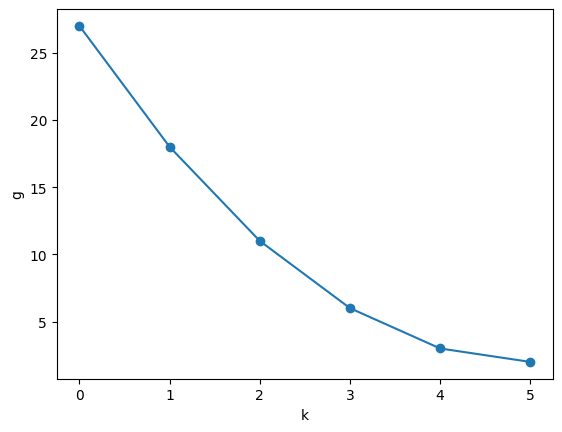

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history, '-o');
plt.xlabel("k");
plt.ylabel("g");